# Homework 1 - Spam Filter Learning Algorithm

Brennan McFarland  
bfm21

# Problem Description

A spam filter attempts to flag messages as spam based on the number of "target words", ie, the number of words likely to appear only in a spam message, it contains.  Based on the number of these target words it finds in a given message, it attempts to estimate the probability that the message is spam using Bayes Rule.  To do this, however, the filter must have an estimate of the probability of a given number of target words given whether the message is spam.  Estimating this probability for all numbers of target words is the problem.

# Random Variables

W represents the number of target words in the message  
    W is a multi-value variable defined for all positive integers  
S represents whether the message is spam  
    S is a binary variable  

# Probabilities

We want P(W|S), the posterior and hidden representation, the probability of a given number of target words given whether the message is spam.  
P(S|W) is our likelihood, the probability of a given message being spam given a certain number of target words.  
P(W) is our prior, the probability of a given number of target words in any given message.
P(S) is our normalizing constant, the probability that any given message is spam.

# Values

Suppose P(S)= 0.3
Suppose P(S|W)=1-1/(W+1).  This way, the probability the message is spam increases with the number of target words found and is in [0,1]


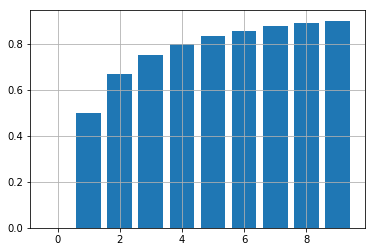

Let P(W) follow the binomial distribution with n= 10 and p= 0.6 .  Setting n to this value means that we are unlikely to find messages with more than 10 spam words to the point that the probability is rounded off to 0.  Also seeing as W represents the number of spam words it would not make sense to have it less than 0.


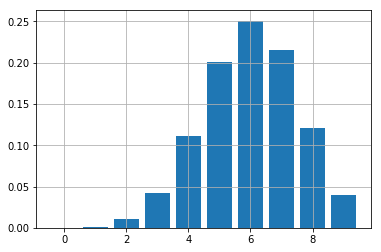

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math


p_s = .3
print("Suppose P(S)=", p_s)

# this is just a helper function so plotting a function isn't so repetitive
def plot_function(x, function):
    y = [function(i) for i in x]
    plt.bar(x, y)
    plt.grid()
    plt.show()

def p_s_given_w(w):
    return 1.0-1.0/(w+1)
print("Suppose P(S|W)=1-1/(W+1).  This way, the probability the message is spam increases with the number of target \
words found and is in [0,1]")
plot_function(range(0, 10), p_s_given_w)


n = 10
p = .6
def p_w(w):
    if(w < 0 or w > n):
       return 0
    return float(math.factorial(n))/float(math.factorial(n-w)*math.factorial(w))*(p**w)*((1-p)**(n-w))
print("Let P(W) follow the binomial distribution with n=", n, "and p=", p, ".  Setting n to this value means that we are \
unlikely to find messages with more than", n, "spam words to the point that the probability is rounded off to 0.  Also \
seeing as W represents the number of spam words it would not make sense to have it less than 0.")
plot_function(range(0, n), p_w)

In this way, for each value of W a random datum on \[0,1\] is generated from the normal distribution for P(W), which in combination with the likelihood and normalizing constant yields our posterior distribution.  Consider these distributions for P(W) and P(S|W) the "generative process".

# Calculating the Posterior

Calculating the posterior, P(W|S), is a simple application of Bayes rule:  
P(W|S)=P(S|W)P(W)/P(S)

# Example Data

Suppose we want to calculate the values of P(W|S) for W=3, 4, 5, 0, and 16 (the last two to test edge cases).  A simple application of Bayes rule yields:

In [53]:
def p_w_given_s(w):
    return p_s_given_w(w)*p_w(w)/p_s


def display_p_w_given_s(w):
    print("for W =", w)
    print("P(W|S)=P(S|W)P(W)/P(S)")
    print("= (", p_s_given_w(w), ")(", p_w(w), ")/(",p_s, ")")
    print("= ", p_w_given_s(w))


display_p_w_given_s(0)
display_p_w_given_s(3)
display_p_w_given_s(4)
display_p_w_given_s(5)
display_p_w_given_s(16)

for W = 0
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.0 )( 0.00010485760000000006 )/( 0.3 )
=  0.0
for W = 3
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.75 )( 0.042467328000000006 )/( 0.3 )
=  0.10616832000000002
for W = 4
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.8 )( 0.11147673600000003 )/( 0.3 )
=  0.29727129600000013
for W = 5
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.8333333333333334 )( 0.20065812480000003 )/( 0.3 )
=  0.5573836800000002
for W = 16
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.9411764705882353 )( 0 )/( 0.3 )
=  0.0


Calculating the posterior for the entire distribution of P(W) is visualized in the graph below.  Note that the probabilities do not sum to 1 because this is a conditional distribution on S:

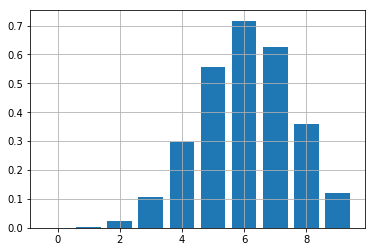

In [91]:
plot_function(range(0, n), p_w_given_s)

# Repeated Sampling

Now let us suppose we do not know P(S|W) or P(W) offhand.  For any W, we can take samples of these values to get an estimate of our posterior:

Here we use 10 samples.
for W = 0
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.0 )( 0.0 )/( 0.3 )
=  0.0
This is an error of 0.0 from the true value of 0.0
for W = 3
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.7 )( 0.0 )/( 0.3 )
=  0.233333333333
This is an error of 0.127165013333 from the true value of 0.10616832000000002
for W = 4
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.8 )( 0.1 )/( 0.3 )
=  0.266666666667
This is an error of 0.0306046293333 from the true value of 0.29727129600000013
for W = 5
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.7 )( 0.1 )/( 0.3 )
=  0.233333333333
This is an error of 0.324050346667 from the true value of 0.5573836800000002
for W = 16
P(W|S)=P(S|W)P(W)/P(S)
= ( 0.9 )( 0.0 )/( 0.3 )
=  0.0
This is an error of 0.0 from the true value of 0.0


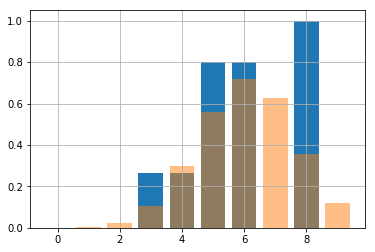

In [97]:
import random

# this is just a helper function to plot multiple functions at once
def plot_functions(x, function1, function2):
    plt.bar(x, [function1(i) for i in x])
    plt.bar(x, [function2(i) for i in x], alpha=.5)
    plt.grid()
    plt.show()


def sample_probability(p):
    return 1 if random.uniform(0, 1) < p else 0


samples = 10
print("Here we use", samples, "samples.")
def sample_p_s_given_w(w):
    return np.mean([sample_probability(p_s_given_w(w)) for i in range(0, samples)])


def sample_p_w(w):
    return np.mean([sample_probability(p_w(w)) for i in range(0, samples)])


def sample_p_w_given_s(w):
    return sample_p_s_given_w(w)*sample_p_w(w)/p_s


def display_sampled_p_w_given_s(w):
    print("for W =", w)
    print("P(W|S)=P(S|W)P(W)/P(S)")
    p_s_given_w_sample = sample_p_s_given_w(w)
    p_w_sample = sample_p_w(w)
    print("= (", p_s_given_w_sample, ")(", p_w_sample, ")/(",p_s, ")")
    p_w_given_s_sample = sample_p_w_given_s(w)
    print("= ", p_w_given_s_sample)
    print("This is an error of", abs(p_w_given_s_sample-p_w_given_s(w)), "from the true value of", p_w_given_s(w))

    
display_sampled_p_w_given_s(0)
display_sampled_p_w_given_s(3)
display_sampled_p_w_given_s(4)
display_sampled_p_w_given_s(5)
display_sampled_p_w_given_s(16)

plot_functions(range(0, n), sample_p_w_given_s, p_w_given_s)


The estimated values are in blue, with the actual values in orange for reference.  Note that with so few samples, the distribution is off by a good margin and returns some probabilities larger than 1 due to error.  We can improve the process by taking more samples, and as is illustrated graphically below our distribution converges towards the exact distribution graphed earlier:

Here we use 60 samples.


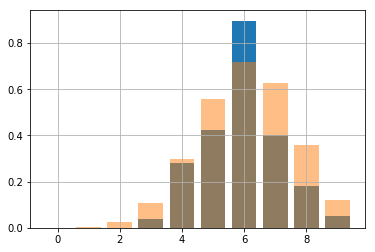

In [95]:
samples = 60
print("Here we use", samples, "samples.")
plot_functions(range(0, n), sample_p_w_given_s, p_w_given_s)

We can also evaluate the accuracy of our spam filter's spam message target word probability by plotting the error of our sampling as we increase the number of samples:

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


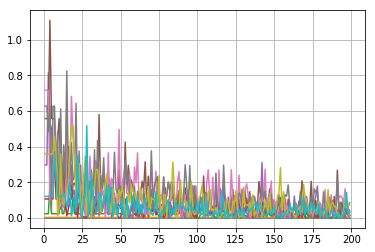

In [113]:
max_samples = 200
x = range(0, max_samples)
y = []
for w in range(0, n):
    y.append([])
samples = 0
for i in range(0, max_samples):
    for w in range(len(y)):
        y[w].append(abs(sample_p_w_given_s(w)-p_w_given_s(w)))
    samples += 1
for w in range(0, n):
    plt.plot(x, y[w])
plt.grid()
plt.show()

From the above graph, it is evident that our estimated value for P(W|S) decreases sharply at first, then less so until after about 75 or so samples a significant large increase in sampling has only a small effect.